# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Read Dataset

In [2]:
fake = pd.read_csv(r"D:\Datasets\Fake.csv")
true = pd.read_csv(r"D:\Datasets\True.csv")

In [3]:
fake.shape

(23481, 4)

In [4]:
true.shape

(21417, 4)

# Data Cleaning and Preparation

In [5]:
# Adding flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [6]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [7]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [8]:
# Check the data
data.head()

,title,text,subject,date,target
0,EPA exercises enforcement discretion for all F...,WASHINGTON (Reuters) - The Environmental Prote...,worldnews,"September 11, 2017",true
1,U.S. Senate tips labor board to Republican maj...,(Reuters) - The U.S. Senate on Monday confirme...,politicsNews,"September 25, 2017",true
2,PC WORLD GONE MAD: HARVARD BUSINESS SCHOOL GRA...,"Yes, we did say she s a Harvard Business Schoo...",left-news,"Aug 8, 2015",fake
3,BREAKING: 19 Yr Old Man ARRESTED After Trying ...,Just another deranged leftist. From the regist...,politics,"Jun 20, 2016",fake
4,Trump's Obamacare shift complicates ability to...,WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,"October 20, 2017",true


In [9]:
# Removing the date (we won't use it for the analysis)
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,EPA exercises enforcement discretion for all F...,WASHINGTON (Reuters) - The Environmental Prote...,worldnews,true
1,U.S. Senate tips labor board to Republican maj...,(Reuters) - The U.S. Senate on Monday confirme...,politicsNews,true
2,PC WORLD GONE MAD: HARVARD BUSINESS SCHOOL GRA...,"Yes, we did say she s a Harvard Business Schoo...",left-news,fake
3,BREAKING: 19 Yr Old Man ARRESTED After Trying ...,Just another deranged leftist. From the regist...,politics,fake
4,Trump's Obamacare shift complicates ability to...,WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,true


In [10]:
# Removing the title (we will only use the text)
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,WASHINGTON (Reuters) - The Environmental Prote...,worldnews,true
1,(Reuters) - The U.S. Senate on Monday confirme...,politicsNews,true
2,"Yes, we did say she s a Harvard Business Schoo...",left-news,fake
3,Just another deranged leftist. From the regist...,politics,fake
4,WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,true


In [11]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,washington (reuters) - the environmental prote...,worldnews,true
1,(reuters) - the u.s. senate on monday confirme...,politicsNews,true
2,"yes, we did say she s a harvard business schoo...",left-news,fake
3,just another deranged leftist. from the regist...,politics,fake
4,washington (reuters) - president donald trump’...,politicsNews,true


In [12]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [13]:
# Check
data.head()

,text,subject,target
0,washington reuters the environmental protecti...,worldnews,true
1,reuters the us senate on monday confirmed wil...,politicsNews,true
2,yes we did say she s a harvard business school...,left-news,fake
3,just another deranged leftist from the registe...,politics,fake
4,washington reuters president donald trump’s d...,politicsNews,true


In [14]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aniket\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
data.head()

,text,subject,target
0,washington reuters environmental protection ag...,worldnews,true
1,reuters us senate monday confirmed william ema...,politicsNews,true
2,yes say harvard business school graduate goes ...,left-news,fake
3,another deranged leftist registered democrat m...,politics,fake
4,washington reuters president donald trump’s di...,politicsNews,true


# Data Exploration

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


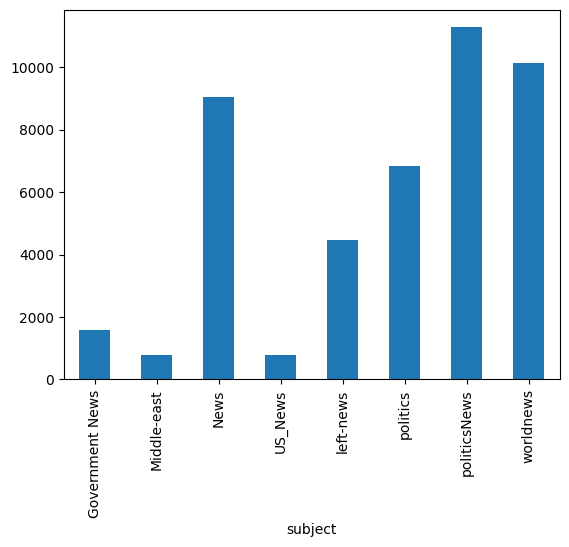

In [16]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


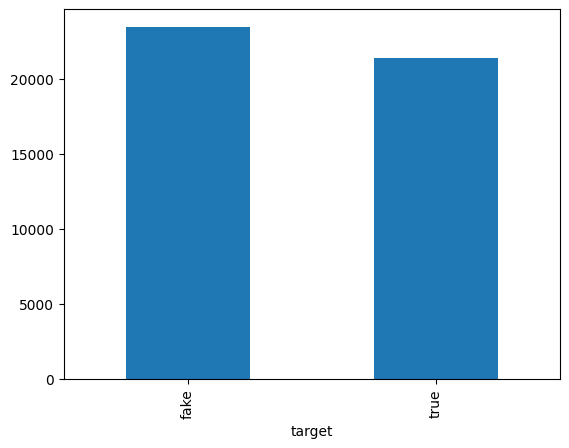

In [17]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

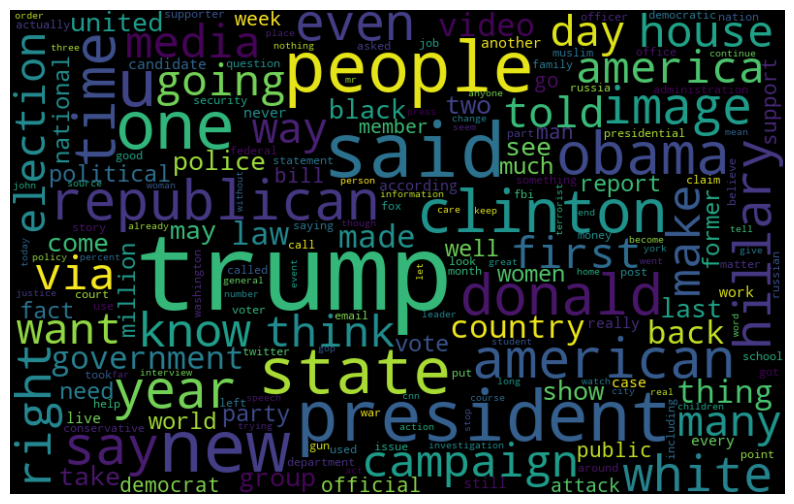

In [18]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

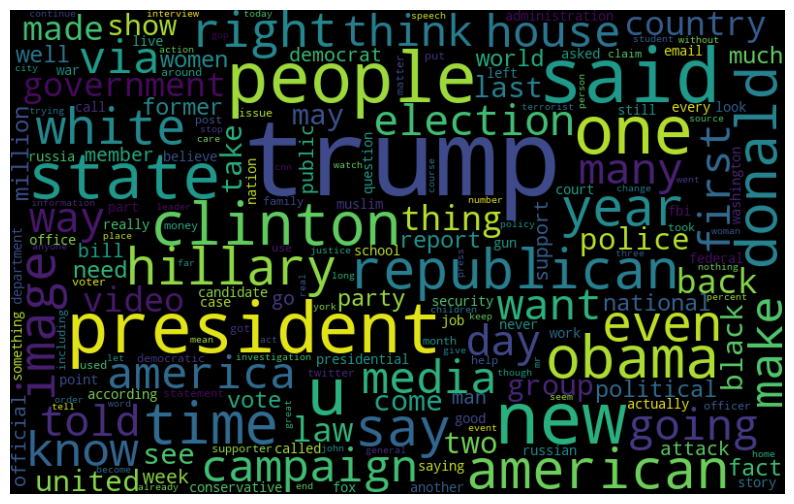

In [19]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

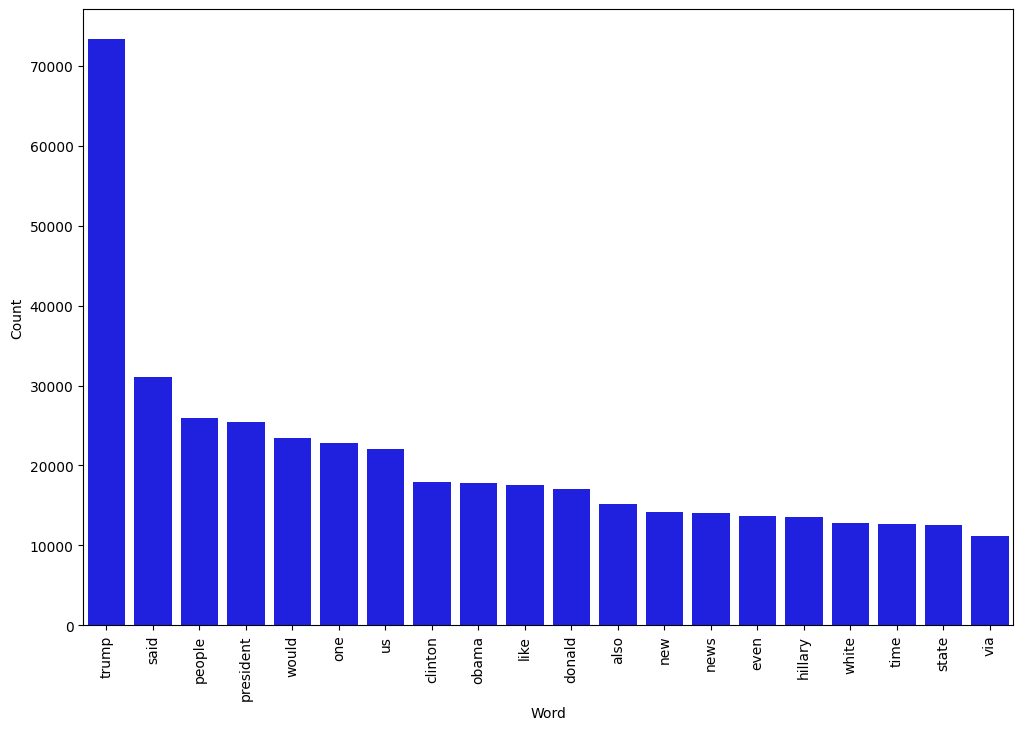

In [21]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

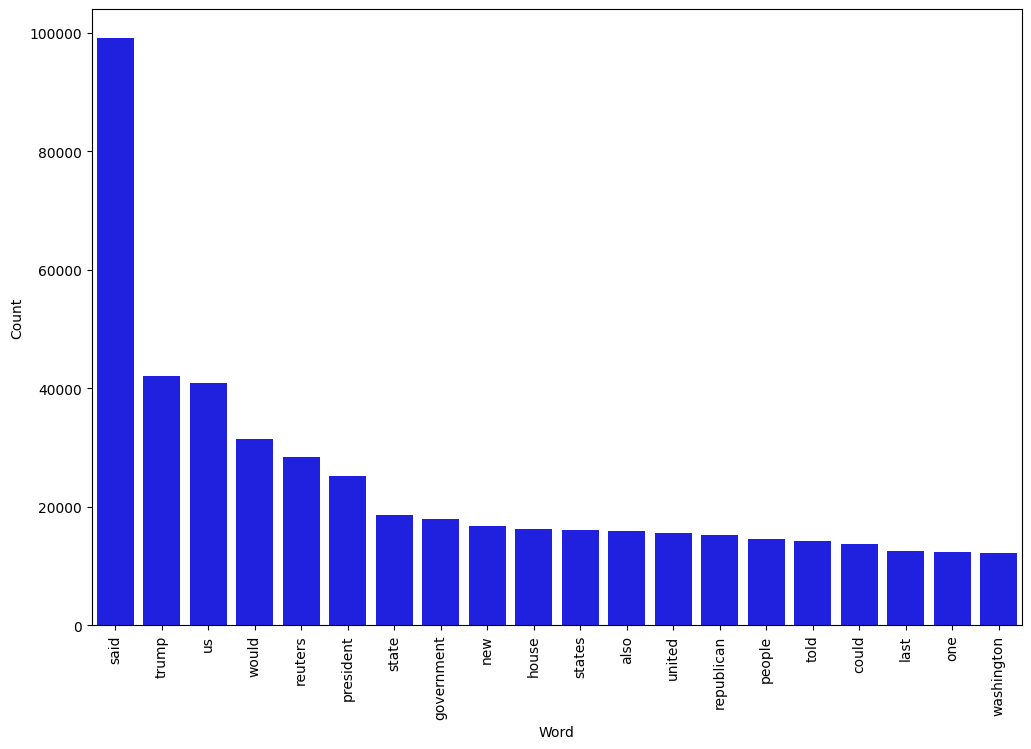

In [22]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

In [23]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Preparing the Data

In [24]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

# Naive Bayes

In [25]:
dct = dict()

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 95.35%


Confusion matrix, without normalization


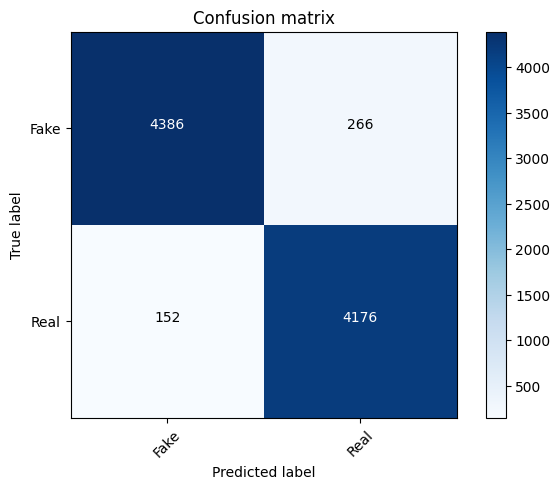

In [26]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Logistics Regression

In [27]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)


accuracy: 98.93%


Confusion matrix, without normalization


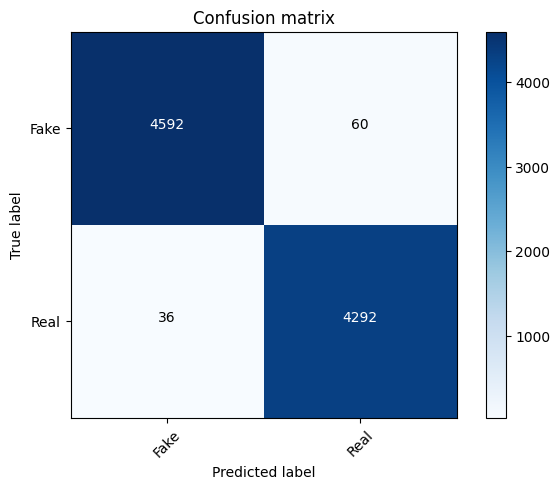

In [28]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.65%


Confusion matrix, without normalization


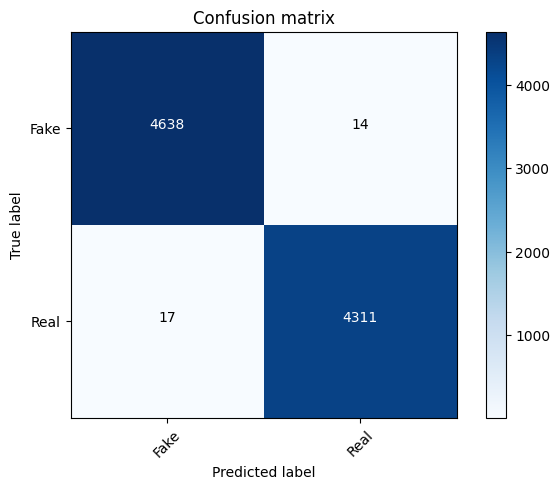

In [30]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)


accuracy: 99.14%


Confusion matrix, without normalization


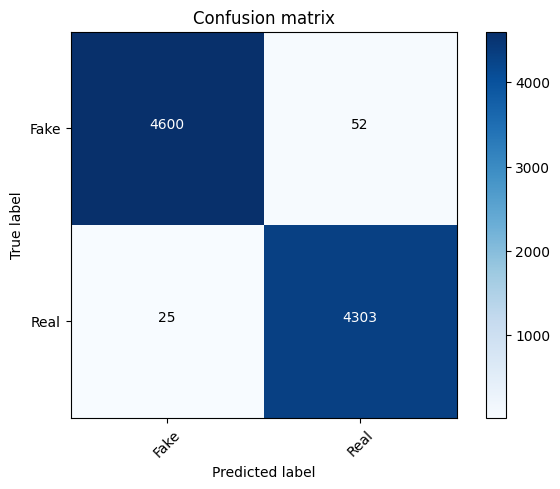

In [32]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Support Vector Machines

In [33]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['SVM'] = round(accuracy_score(y_test, prediction)*100,2)



accuracy: 99.52%


Confusion matrix, without normalization


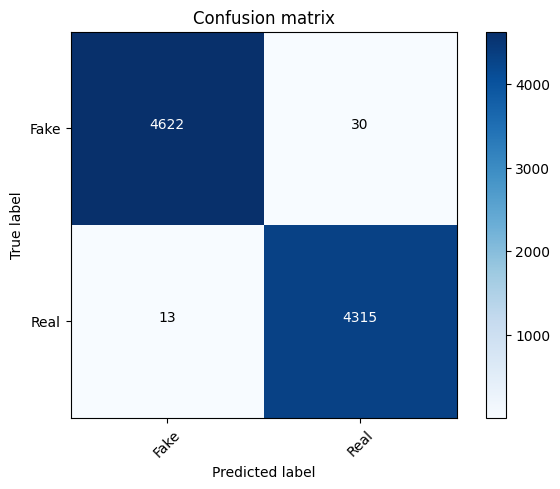

In [34]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Comparing Different Models

([<matplotlib.axis.YTick at 0x123d8979010>,
 [Text(0, 91, '91'),
  Text(0, 92, '92'),
  Text(0, 93, '93'),
  Text(0, 94, '94'),
  Text(0, 95, '95'),
  Text(0, 96, '96'),
  Text(0, 97, '97'),
  Text(0, 98, '98'),
  Text(0, 99, '99'),
  Text(0, 100, '100')])

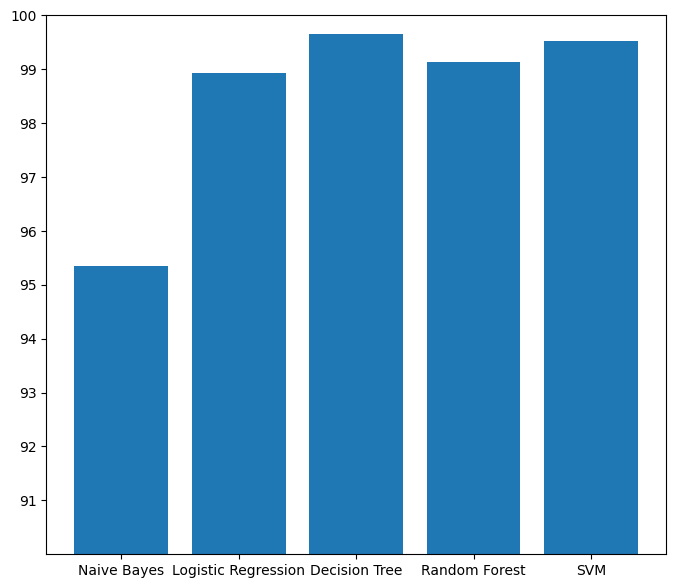

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(90,100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Recreate the vectorizer with the same configuration used during training
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')  # Adjust parameters as needed

# Save the recreated vectorizer
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf_vectorizer, f)

print("New vectorizer saved successfully.")


New vectorizer saved successfully.


In [43]:
# Example input
sample_text = "Breaking news! This is a test for fake news detection."

# Ensure the vectorizer and model work together
try:
    transformed_input = vectorizer.transform([sample_text])  # Transform the input
    prediction = model.predict(transformed_input)  # Predict using the model
    result = "Real News" if prediction[0] == 1 else "Fake News"
    print("Prediction result:", result)
except Exception as e:
    print("Error during prediction:", str(e))


Error during prediction: name 'vectorizer' is not defined


In [45]:
# Save the model
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save the vectorizer
with open("pipe.pkl", "wb") as f:
    pickle.dump(pipe, f)

print("Model and vectorizer files updated successfully.")


Model and vectorizer files updated successfully.


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
import pickle

# Example model and vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
model = RandomForestClassifier()

# Train the vectorizer and model (ensure you have X_train and y_train)
X_train = ["sample text 1", "sample text 2"]  # Example data
y_train = [1, 0]  # Example labels
X_train_vec = vectorizer.fit_transform(X_train)
model.fit(X_train_vec, y_train)

# Save the model and vectorizer
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("pipe.pkl", "wb") as f:
    pickle.dump(vectorizer, f)


In [48]:
import pickle

# Ensure correct paths and filenames
model_path = "model.pkl"
vectorizer_path = "pipe.pkl"

try:
    with open(model_path, "rb") as f:
        model = pickle.load(f)
except EOFError:
    print(f"Error: The file {model_path} is empty or corrupted.")

try:
    with open(vectorizer_path, "rb") as f:
        vectorizer = pickle.load(f)
except EOFError:
    print(f"Error: The file {vectorizer_path} is empty or corrupted.")


In [49]:
import os

if not os.path.exists(model_path):
    print("Model file not found.")
else:
    print(f"Model file found: {model_path}")

if not os.path.exists(vectorizer_path):
    print("Vectorizer file not found.")
else:
    print(f"Vectorizer file found: {vectorizer_path}")


Model file found: model.pkl
Vectorizer file found: pipe.pkl


In [50]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

# Example of saving model and vectorizer after training
vectorizer = TfidfVectorizer(max_features=5000)
model = RandomForestClassifier()

# Example data
X_train = ["sample news text", "another piece of news"]
y_train = [1, 0]  # 1 for Real News, 0 for Fake News

# Train and save the vectorizer and model
vectorizer.fit(X_train)
model.fit(vectorizer.transform(X_train), y_train)

# Save the vectorizer and model
with open("pipe.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)
